In [1096]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

from pathlib import Path
RANDOM_SEED = 8  

In [1097]:
DATA_PATH =  Path.cwd() / "data"
print(DATA_PATH / "training_set_features.csv")
data_df = pd.read_csv(
    DATA_PATH / "train.csv", 
    index_col="tripid"
)


/home/haritha/Documents/machine_learning/project/data/training_set_features.csv


In [1098]:
#################     VISUALIZATION AND PREPROCESSING      #####################






################################################################################

In [1099]:
print("data_df.shape", data_df.shape)
#features_df.head()
data_df.head()

data_df.shape (17176, 13)


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [1100]:
data_df.describe()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
count,16974.000000,16974.000000,16974.000000,16974.000000,16974.000000,17176.000000,17176.000000,17176.000000,17176.000000,17039.000000
mean,13.719651,1702.858077,629.074231,32.057666,112.466832,6.965499,79.998389,6.968587,79.997534,312.655466
std,98.975052,8120.160818,8063.260669,465.483573,442.054812,0.210760,0.243384,0.378669,0.359648,605.300565
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.819100,5.941860,45.307700,0.000000
25%,10.500000,548.000000,33.000000,0.000000,26.000000,6.865077,79.870400,6.865625,79.870100,125.515000
50%,10.500000,1009.500000,123.000000,0.116600,73.000000,6.914105,79.898600,6.916160,79.899100,211.180000
75%,10.500000,1803.000000,351.000000,14.341800,144.000000,7.043057,79.956600,7.047195,79.960225,366.465000
max,12795.030000,453872.000000,453650.000000,26198.601400,51288.000000,8.051010,81.009600,48.132000,81.009700,26945.990000


In [1101]:
#drop nan values
data_df = data_df.dropna()
data_df.head()


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
189129552,10.5,3407.0,182.0,0.0000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,correct


In [1102]:
data_df.dtypes

additional_fare              float64
duration                     float64
meter_waiting                float64
meter_waiting_fare           float64
meter_waiting_till_pickup    float64
pickup_time                   object
drop_time                     object
pick_lat                     float64
pick_lon                     float64
drop_lat                     float64
drop_lon                     float64
fare                         float64
label                         object
dtype: object

In [1103]:
correct_vals = data_df['label']=="correct"
correct_data = data_df[correct_vals]
incorrect_vals = data_df['label']=="incorrect"
incorrect_data = data_df[incorrect_vals]

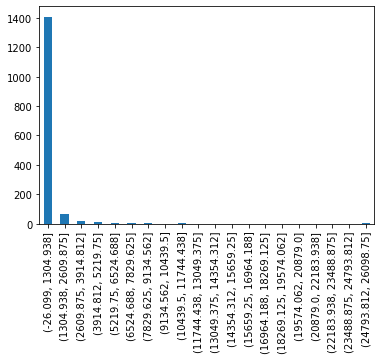

In [1104]:
#descretize floats for visualization
fare = pd.cut((incorrect_data)['fare'], bins=20)
ax = fare.value_counts(sort=False).plot.bar()
#ax.set_xticklabels([c[1:-1].replace(","," to") for c in fare.cat.categories])

In [1105]:
#plot labels with fare
counts = data_df[['fare', 'label']].groupby(['fare', 'label']).size().unstack('label')
counts


label,correct,incorrect
fare,,
0.00,1.0,13.0
50.48,1.0,NaN
50.63,1.0,NaN
50.72,1.0,NaN
50.75,1.0,NaN
...,...,...
19865.46,NaN,1.0
25097.59,NaN,1.0
25315.09,NaN,1.0


In [1106]:
#seperate the labels
label_df = pd.DataFrame(data_df['label'])
print(label_df.columns)
print(label_df.head())
label_df.describe()

Index(['label'], dtype='object')
             label
tripid            
189123628  correct
189125358  correct
189125719  correct
189127273  correct
189129552  correct


,label
count,16968
unique,2
top,correct
freq,15442


In [1107]:
#change labels to 1,0
label_map = {'correct': 1, 'incorrect': 0}
label_df['label'] = label_df['label'].map(label_map)
#label_df['label'].eq('correct').mul(1)

data_df = data_df.drop(columns=['label'])
label_df.head()

,label
tripid,
189123628,1
189125358,1
189125719,1
189127273,1
189129552,1


In [1108]:
#initial visualizations
fig, ax = plt.subplots(1, 1, sharex=True)

n_obs = label_df.shape[0]

(label_df['label']
    .value_counts()
    .div(n_obs)
    .plot.barh(.dt.hourtitle="Proportion of correct fares")
)
ax.set_ylabel("fare_correct")

SyntaxError: invalid syntax (<ipython-input-1108-be9064926399>, line 9)

In [1109]:
#feature-engineering - straight line distance
data_df['distance'] = ((data_df['drop_lat'].sub(data_df['pick_lat'])).mul(data_df['drop_lat'].sub(data_df['pick_lat']))).add((data_df['drop_lon'].sub(data_df['pick_lon'])).mul(data_df['drop_lon'].sub(data_df['pick_lon'])))

In [1110]:
#feature-engineering - discrepancies IGONRE INF
#data_df['duration_desc'] = (data_df['duration']).div(pd.to_datetime(data_df['drop_time']).sub(pd.to_datetime(data_df['pickup_time']))/ np.timedelta64(1, 's'))
#data_df['meter_waiting_desc'] = (data_df['meter_waiting_fare'].div(data_df['meter_waiting']))
#replace the inf values from div by 0 with 0
#data_df = data_df.replace([np.inf, -np.inf], 0)
#data_df['duration_desc'] = (data_df['duration']).div(pd.to_datetime(data_df['drop_time']).sub(pd.to_datetime(data_df['pickup_time']))/ np.timedelta64(1, 's'))
#data_df['meter_waiting_desc'] = (data_df['meter_waiting_fare'].div(data_df['meter_waiting']))
#replace the inf values from div by 0 with 0
#data_df = data_df.replace([np.inf, -np.inf], 0)

data_df['duration2'] = pd.to_datetime(data_df['drop_time']).sub(pd.to_datetime(data_df['pickup_time']))/ np.timedelta64(1, 's')

In [1111]:
#feature-engineering -enhance feature by crossing with itself
#data_df['additional_fare'] = data_df['additional_fare'].mul(data_df['additional_fare'])
#data_df['fare'] = data_df['fare'].mul(data_df['fare'])


In [1112]:
#feature-engineering - additional features
data_df['fare_over_dist'] = (data_df['fare'].sub(data_df['meter_waiting_fare'])).div(data_df['distance'])

data_df['fare_over_time'] = (data_df['fare'].sub(data_df['meter_waiting_fare'])).div(data_df['duration'].sub(data_df['meter_waiting']))
data_df['distance_over_time'] = data_df['distance'].div(data_df['duration'].sub(data_df['meter_waiting']))

data_df['wait_time_over_time'] = data_df['meter_waiting'].div(data_df['duration'])

data_df['add_fare_over_dist'] = data_df['additional_fare'].div(data_df['distance'])

data_df['add_fare_over_tot_fare'] = data_df['additional_fare'].div(data_df['additional_fare'].add(data_df['fare']))

data_df['time_over_fare'] = data_df['additional_fare'].div(data_df['distance'])


#replace the inf values from div by 0 with 0
data_df = data_df.replace([np.inf, -np.inf], 0)

#for col in ['fare_over_dist', 'fare_over_time', 'distance_over_time', 'wait_time_over_time', 'add_fare_over_dist', 'add_fare_over_tot_fare', 'time_over_fare']:
#    data_df[col] = data_df[col].replace([np.inf, -np.inf], 0)

In [1113]:
#feature-engineering - dates
#since duration is aready present, it should be sufficient to keep only pick time, and drop drop_time

data_df = data_df.drop(columns=['drop_time'])

#print(data_df.iloc[1, 5])
data_df['weekday'] = pd.to_datetime(data_df['pickup_time']).dt.weekday
data_df['dayOfWeek_bins'] = pd.to_datetime(data_df['pickup_time']).dt.dayofweek
data_df['hour_bins'] = pd.to_datetime(data_df['pickup_time']).dt.hour

#peak / off peak times
#hour = pd.to_datetime(data_df['pickup_time']).dt.hour
peak_times = [7,8,13,17,18]
data_df['peak_time'] = pd.to_datetime(data_df['pickup_time']).dt.hour.map(lambda element: (1 if (element in peak_times) else 0) )

In [1114]:
data_df.describe()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,distance,duration2,fare_over_dist,fare_over_time,distance_over_time,wait_time_over_time,add_fare_over_dist,add_fare_over_tot_fare,time_over_fare,weekday,dayOfWeek_bins,hour_bins,peak_time
count,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,1.696800e+04,16966.000000,1.696800e+04,16966.000000,1.696800e+04,16954.000000,1.696800e+04,16968.000000,16968.000000,16968.000000,16968.000000
mean,13.721437,1702.836987,628.875000,32.045122,112.489510,6.965160,79.998018,6.968278,79.997108,312.657884,0.174335,1703.433522,1.364273e+10,0.356829,6.746213e-04,0.510701,5.174359e+08,0.062128,5.174359e+08,2.919731,2.919731,13.802746,0.298267
std,98.992493,8121.556167,8064.657846,465.564240,442.129943,0.210840,0.242832,0.380253,0.360503,606.372103,22.267770,8121.332508,3.665386e+11,2.670726,8.467162e-02,40.337371,9.120871e+09,0.049224,9.120871e+09,1.940086,1.940086,4.819490,0.457511
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.819100,5.941860,45.307700,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-2.005676e-08,0.000000,0.000000e+00,0.000390,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,10.500000,548.000000,33.000000,0.000000,26.000000,6.864830,79.870475,6.865580,79.870100,125.500000,0.000180,540.000000,9.524023e+04,0.163975,4.367064e-07,0.055638,3.604634e+03,0.028730,3.604634e+03,1.000000,1.000000,10.000000,0.000000
50%,10.500000,1009.000000,123.000000,0.115600,73.000000,6.913970,79.898600,6.915940,79.899000,211.050000,0.000843,1020.000000,2.115871e+05,0.216176,1.184710e-06,0.136792,1.301776e+04,0.049218,1.301776e+04,3.000000,3.000000,14.000000,0.000000
75%,10.500000,1802.250000,351.000000,14.334400,144.000000,7.042698,79.956500,7.046555,79.960000,366.205000,0.003076,1800.000000,6.490663e+05,0.277491,2.625389e-06,0.269400,5.989368e+04,0.079194,5.989368e+04,5.000000,5.000000,18.000000,1.000000
max,12795.030000,453872.000000,453650.000000,26198.601400,51288.000000,8.051010,81.009600,48.132000,81.009700,26945.990000,2900.631234,453840.000000,3.862116e+13,321.125720,1.102902e+01,5254.100000,6.050000e+11,0.587735,6.050000e+11,6.000000,6.000000,23.000000,1.000000


In [1115]:
data_df.head(100)

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,distance,duration2,fare_over_dist,fare_over_time,distance_over_time,wait_time_over_time,add_fare_over_dist,add_fare_over_tot_fare,time_over_fare,weekday,dayOfWeek_bins,hour_bins,peak_time
tripid,,,,,,,,,,,,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.000000,64.0,11/1/2019 0:20,6.86252,79.8993,6.90330,79.8783,270.32,2.104008e-03,840.0,1.284786e+05,0.324125,2.704381e-06,0.067146,4.990474e+03,0.037390,4.990474e+03,4,4,0,0
189125358,10.5,791.0,47.0,0.000000,134.0,11/1/2019 0:56,6.88589,79.8984,6.91373,79.8923,197.85,8.122756e-04,780.0,2.435750e+05,0.250126,1.091768e-06,0.059418,1.292665e+04,0.050396,1.292665e+04,4,4,0,0
189125719,10.5,1087.0,80.0,0.000000,61.0,11/1/2019 1:08,6.90839,79.8651,6.93669,79.9146,301.64,3.251140e-03,1080.0,9.277976e+04,0.277498,3.228540e-06,0.073597,3.229636e+03,0.033639,3.229636e+03,4,4,1,0
189127273,10.5,598.0,271.0,15.663800,68.0,11/1/2019 2:27,6.92570,79.8895,6.92748,79.8971,82.30,6.092840e-05,600.0,1.093680e+06,0.111432,1.863254e-07,0.453177,1.723334e+05,0.113147,1.723334e+05,4,4,2,0
189129552,10.5,3407.0,182.0,0.000000,112.0,11/1/2019 5:38,7.13402,79.8969,6.91865,79.8649,1065.02,4.740824e-02,3420.0,2.246487e+04,0.312598,1.470023e-05,0.053419,2.214805e+02,0.009763,2.214805e+02,4,4,5,0
189132829,10.5,1246.0,487.0,0.000000,133.0,11/1/2019 6:29,6.84371,79.9051,6.85069,79.8624,266.62,1.872010e-03,1200.0,1.424244e+05,0.213981,2.466417e-06,0.390851,5.608943e+03,0.037890,5.608943e+03,4,4,6,0
189135103,10.5,1333.0,295.0,17.198500,212.0,11/1/2019 6:50,6.90760,79.9524,6.90634,79.9042,318.05,2.324828e-03,1320.0,1.294081e+05,0.225695,2.239718e-06,0.221305,4.516464e+03,0.031959,4.516464e+03,4,4,6,0
189139296,10.5,360.0,80.0,4.664000,3.0,11/1/2019 7:00,7.26706,80.6064,7.27422,80.6124,100.32,8.726560e-05,360.0,1.096148e+06,0.265711,3.116629e-07,0.222222,1.203223e+05,0.094748,1.203223e+05,4,4,7,1
189138671,10.5,1539.0,588.0,33.986400,43.0,11/1/2019 7:02,6.85137,79.9537,6.84779,79.9274,257.89,7.045064e-04,1560.0,3.178163e+05,0.145486,7.408059e-07,0.382066,1.490405e+04,0.039122,1.490405e+04,4,4,7,1


In [1116]:
data_df.	15	False	6.923701e-04
189245392	10.5	1582.0	376.0	21.9208	5.0	11/1/2019 16:05	6.86967	79.8807	6.86950	79.8805	276.01	1.014103	0.0583	4	4	16	False	6.890000e-08
189245966	5.0	382.0	28.0	1.6324	0.0	11/1/2019 16:05	6.78391	79.8871	6.78851	79.8983	87.27	1.061111	0.0583	4	describe()

SyntaxError: invalid syntax (<ipython-input-1116-3b532cf7bf03>, line 1)

In [ ]:
"""
cols = ['additional_fare','meter_waiting_fare','duration','meter_waiting','meter_waiting_till_pickup','pick_lat','pick_lon', 'drop_lat','drop_lon','fare']
for col  in cols:
    data_df = data_df.astype({col: 'float32'})
"""

In [1117]:
data_df = data_df.drop(columns=['pickup_time'])
data_df = data_df.astype({'dayOfWeek_bins': 'uint8'})
data_df = data_df.astype({'hour_bins': 'uint8'})


In [1118]:
data_df.describe()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,distance,duration2,fare_over_dist,fare_over_time,distance_over_time,wait_time_over_time,add_fare_over_dist,add_fare_over_tot_fare,time_over_fare,weekday,dayOfWeek_bins,hour_bins,peak_time
count,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,1.696800e+04,16966.000000,1.696800e+04,16966.000000,1.696800e+04,16954.000000,1.696800e+04,16968.000000,16968.000000,16968.000000,16968.000000
mean,13.721437,1702.836987,628.875000,32.045122,112.489510,6.965160,79.998018,6.968278,79.997108,312.657884,0.174335,1703.433522,1.364273e+10,0.356829,6.746213e-04,0.510701,5.174359e+08,0.062128,5.174359e+08,2.919731,2.919731,13.802746,0.298267
std,98.992493,8121.556167,8064.657846,465.564240,442.129943,0.210840,0.242832,0.380253,0.360503,606.372103,22.267770,8121.332508,3.665386e+11,2.670726,8.467162e-02,40.337371,9.120871e+09,0.049224,9.120871e+09,1.940086,1.940086,4.819490,0.457511
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.819100,5.941860,45.307700,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-2.005676e-08,0.000000,0.000000e+00,0.000390,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,10.500000,548.000000,33.000000,0.000000,26.000000,6.864830,79.870475,6.865580,79.870100,125.500000,0.000180,540.000000,9.524023e+04,0.163975,4.367064e-07,0.055638,3.604634e+03,0.028730,3.604634e+03,1.000000,1.000000,10.000000,0.000000
50%,10.500000,1009.000000,123.000000,0.115600,73.000000,6.913970,79.898600,6.915940,79.899000,211.050000,0.000843,1020.000000,2.115871e+05,0.216176,1.184710e-06,0.136792,1.301776e+04,0.049218,1.301776e+04,3.000000,3.000000,14.000000,0.000000
75%,10.500000,1802.250000,351.000000,14.334400,144.000000,7.042698,79.956500,7.046555,79.960000,366.205000,0.003076,1800.000000,6.490663e+05,0.277491,2.625389e-06,0.269400,5.989368e+04,0.079194,5.989368e+04,5.000000,5.000000,18.000000,1.000000
max,12795.030000,453872.000000,453650.000000,26198.601400,51288.000000,8.051010,81.009600,48.132000,81.009700,26945.990000,2900.631234,453840.000000,3.862116e+13,321.125720,1.102902e+01,5254.100000,6.050000e+11,0.587735,6.050000e+11,6.000000,6.000000,23.000000,1.000000


In [1119]:
#data_df = pd.concat([data_df, pd.get_dummies(data_df['dayOfWeek_bins'], prefix = "dayOfWeek")], axis=1).drop(['dayOfWeek_bins'], axis=1)
#data_df = pd.concat([data_df, pd.get_dummies(data_df['hour_bins'], prefix = "hour")], axis=1).drop(['hour_bins'], axis=1)
data_df = data_df.drop(['dayOfWeek_bins', 'hour_bins'], axis=1)

In [1120]:
#feature engineering - bin & encode lat, long,  day of week and hour

cols_to_bin = ['pick_lat', 'pick_lon', 'drop_lat', 'drop_lon']
bin_values = []
for i in range(len(cols_to_bin)):
    print(i)
    if (i <8):
        #data_df[cols_to_bin[i]+"_bins"], bins = pd.cut(data_df[cols_to_bin[i]], 10, retbins=True)
        #data_df = data_df.astype({cols_to_bin[i]+"_bins": 'int32'})
        data_df = data_df.drop(cols_to_bin[i], axis=1)
        #bin_values.append(bins)
    #one_hot = pd.get_dummies(data_df[cols_to_bin[i]+"_bins"], prefix = cols_to_bin[i])
    #data_df = data_df.drop(cols_to_bin[i]+"_bins", axis=1)
    #data_df = data_df.join(one_hot)
    #data_df = pd.concat([data_df, pd.get_dummies(data_df[cols_to_bin[i]+"_bins"], prefix = cols_to_bin[i])], axis=1).drop([cols_to_bin[i]+"_bins"], axis=1)



0
1
2
3


In [1121]:
data_df.describe()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,distance,duration2,fare_over_dist,fare_over_time,distance_over_time,wait_time_over_time,add_fare_over_dist,add_fare_over_tot_fare,time_over_fare,weekday,peak_time
count,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,1.696800e+04,16966.000000,1.696800e+04,16966.000000,1.696800e+04,16954.000000,1.696800e+04,16968.000000,16968.000000
mean,13.721437,1702.836987,628.875000,32.045122,112.489510,312.657884,0.174335,1703.433522,1.364273e+10,0.356829,6.746213e-04,0.510701,5.174359e+08,0.062128,5.174359e+08,2.919731,0.298267
std,98.992493,8121.556167,8064.657846,465.564240,442.129943,606.372103,22.267770,8121.332508,3.665386e+11,2.670726,8.467162e-02,40.337371,9.120871e+09,0.049224,9.120871e+09,1.940086,0.457511
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-2.005676e-08,0.000000,0.000000e+00,0.000390,0.000000e+00,0.000000,0.000000
25%,10.500000,548.000000,33.000000,0.000000,26.000000,125.500000,0.000180,540.000000,9.524023e+04,0.163975,4.367064e-07,0.055638,3.604634e+03,0.028730,3.604634e+03,1.000000,0.000000
50%,10.500000,1009.000000,123.000000,0.115600,73.000000,211.050000,0.000843,1020.000000,2.115871e+05,0.216176,1.184710e-06,0.136792,1.301776e+04,0.049218,1.301776e+04,3.000000,0.000000
75%,10.500000,1802.250000,351.000000,14.334400,144.000000,366.205000,0.003076,1800.000000,6.490663e+05,0.277491,2.625389e-06,0.269400,5.989368e+04,0.079194,5.989368e+04,5.000000,1.000000
max,12795.030000,453872.000000,453650.000000,26198.601400,51288.000000,26945.990000,2900.631234,453840.000000,3.862116e+13,321.125720,1.102902e+01,5254.100000,6.050000e+11,0.587735,6.050000e+11,6.000000,1.000000


In [1122]:
#data_df = data_df.drop(['drop_lat', 'drop_lon'], axis=1)
#data_df.describe()


In [1123]:
#split into train /test sets
X_train_temp, X_eval, y_train_temp, y_eval = train_test_split(
    data_df,
    label_df,
    test_size=0.2,
    shuffle=True,
    stratify=label_df,
    random_state=RANDOM_SEED
)

#split train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    data_df,
    label_df,
    test_size=0.2,
    shuffle=True,
    stratify=label_df,
    random_state=RANDOM_SEED
)

In [1124]:
#load test data
test_features_df = pd.read_csv(DATA_PATH / "test.csv", 
                               index_col="tripid")

test_features_df.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
tripid,,,,,,,,,,,,
213284604,10.5,924,42,2.4486,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27
213286352,10.5,4249,20,0.0000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70
213293973,10.5,1552,255,2.6588,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00
213294622,10.5,462,16,0.0000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32
213298687,10.5,814,392,12.3692,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47


In [1125]:
submission_df = pd.read_csv(DATA_PATH / "sample_submission.csv", 
                            index_col="tripid")
submission_df.head()

,prediction
tripid,
213284604,1
213286352,0
213293973,0
213294622,1
213298687,1


In [1126]:
#preproccessing
#feature-engineering 
#since duration is aready present, it should be sufficient to keep only pick time, and drop drop_time

#test_features_df['duration_desc'] = (test_features_df['duration']).div(pd.to_datetime(test_features_df['drop_time']).sub(pd.to_datetime(test_features_df['pickup_time']))/ np.timedelta64(1, 's'))
#test_features_df['meter_waiting_desc'] = (test_features_df['meter_waiting_fare'].div(test_features_df['meter_waiting']))
#replace the inf values from div by 0 with 0
test_features_df = test_features_df.replace([np.inf, -np.inf], 0)
test_features_df['duration2'] = pd.to_datetime(test_features_df['drop_time']).sub(pd.to_datetime(test_features_df['pickup_time']))/ np.timedelta64(1, 's')
test_features_df['distance'] = ((test_features_df['drop_lat'].sub(test_features_df['pick_lat'])).mul(test_features_df['drop_lat'].sub(test_features_df['pick_lat']))).add((test_features_df['drop_lon'].sub(test_features_df['pick_lon'])).mul(test_features_df['drop_lon'].sub(test_features_df['pick_lon'])))

#feature-engineering - additional features
test_features_df['fare_over_dist'] = (test_features_df['fare'].sub(test_features_df['meter_waiting_fare'])).div(test_features_df['distance'])
test_features_df['fare_over_time'] = (test_features_df['fare'].sub(test_features_df['meter_waiting_fare'])).div(test_features_df['duration'].sub(test_features_df['meter_waiting'])                                                                                    )
test_features_df['distance_over_time'] = test_features_df['distance'].div(test_features_df['duration'].sub(test_features_df['meter_waiting']))
test_features_df['wait_time_over_time'] = test_features_df['meter_waiting'].div(test_features_df['duration'])
test_features_df['add_fare_over_dist'] = test_features_df['additional_fare'].div(test_features_df['distance'])
test_features_df['add_fare_over_tot_fare'] = test_features_df['additional_fare'].div(test_features_df['additional_fare'].add(test_features_df['fare']))
test_features_df['time_over_fare'] = test_features_df['additional_fare'].div(test_features_df['distance'])


#replace the inf values from div by 0 with 0
test_features_df = test_features_df.replace([np.inf, -np.inf], 0)

test_features_df = test_features_df.drop(columns=['drop_time'])
test_features_df['peak_time'] = pd.to_datetime(test_features_df['pickup_time']).dt.hour.map(lambda element: (1 if (element in peak_times) else 0) )

test_features_df['weekday'] = pd.to_datetime(test_features_df['pickup_time']).dt.weekday
test_features_df['dayOfWeek_bins'] = pd.to_datetime(test_features_df['pickup_time']).dt.dayofweek
test_features_df['hour_bins'] = pd.to_datetime(test_features_df['pickup_time']).dt.hour
"""
cols = ['additional_fare','meter_waiting_fare','duration','meter_waiting','meter_waiting_till_pickup','pick_lat','pick_lon', 'drop_lat','drop_lon','fare']
for col  in cols:
    test_features_df = test_features_df.astype({col: 'float32'})
"""    

test_features_df = test_features_df.astype({'dayOfWeek_bins': 'uint8'})
test_features_df = test_features_df.astype({'hour_bins': 'uint8'})
test_features_df = test_features_df.drop(columns=['pickup_time'])
    
#test_features_df = pd.concat([test_features_df, pd.get_dummies(test_features_df['dayOfWeek_bins'], prefix = "dayOfWeek")], axis=1).drop(['dayOfWeek_bins'], axis=1)
#test_features_df = pd.concat([test_features_df, pd.get_dummies(test_features_df['hour_bins'], prefix = "hour")], axis=1).drop(['hour_bins'], axis=1)
test_features_df = test_features_df.drop(['dayOfWeek_bins', 'hour_bins'], axis=1)

#feature engineering - bin & encode lat, long,  day of week and hour

cols_to_bin = ['pick_lat', 'pick_lon', 'drop_lat', 'drop_lon']

for i in range(len(cols_to_bin)):
    print(i)
    if (i <4):
        #test_features_df[cols_to_bin[i]+"_bins"] = pd.cut(test_features_df[cols_to_bin[i]], bins=bin_values[i])
        test_features_df = test_features_df.drop(cols_to_bin[i], axis=1)

    #test_features_df = pd.concat([test_features_df, pd.get_dummies(test_features_df[cols_to_bin[i]+"_bins"], prefix = cols_to_bin[i])], axis=1).drop([cols_to_bin[i]+"_bins"], axis=1)


    

    
    
    
test_features_df.describe()   

0
1
2
3


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,duration2,distance,fare_over_dist,fare_over_time,distance_over_time,wait_time_over_time,add_fare_over_dist,add_fare_over_tot_fare,time_over_fare,peak_time,weekday
count,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8.576000e+03,8575.000000,8.575000e+03,8575.000000,8.576000e+03,8574.000000,8.576000e+03,8576.000000,8576.000000
mean,11.088095,1541.590485,508.502099,24.671655,119.863106,293.278057,1542.054571,0.003087,1.485755e+10,1.760411,2.397331e-05,0.197693,4.166799e+08,0.056961,4.166799e+08,0.289646,3.009445
std,5.359602,5952.458574,5784.005855,333.515641,793.233190,436.730282,5952.333969,0.007716,3.291359e+11,13.715820,5.036741e-04,0.212021,5.542791e+09,0.036548,5.542791e+09,0.453624,1.962216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000391,0.000000e+00,0.000000,0.000000
25%,10.500000,540.000000,30.000000,0.000000,26.000000,126.077500,540.000000,0.000197,9.629229e+04,0.217884,4.778592e-07,0.050856,3.602582e+03,0.029799,3.602582e+03,0.000000,1.000000
50%,10.500000,982.500000,116.000000,0.000000,72.000000,203.950000,960.000000,0.000847,2.065777e+05,0.257722,1.232782e-06,0.128975,1.245988e+04,0.049145,1.245988e+04,0.000000,3.000000
75%,10.500000,1723.000000,336.250000,11.744200,138.000000,344.075000,1740.000000,0.002950,6.068807e+05,0.313648,2.664323e-06,0.263862,5.084901e+04,0.076091,5.084901e+04,1.000000,5.000000
max,160.500000,447230.000000,446934.000000,25760.361800,55571.000000,26844.330000,447240.000000,0.218478,2.077419e+13,442.302200,3.613611e-02,1.000000,1.050000e+11,0.342356,1.050000e+11,1.000000,6.000000


In [1127]:
data_df.describe()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,distance,duration2,fare_over_dist,fare_over_time,distance_over_time,wait_time_over_time,add_fare_over_dist,add_fare_over_tot_fare,time_over_fare,weekday,peak_time
count,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,1.696800e+04,16966.000000,1.696800e+04,16966.000000,1.696800e+04,16954.000000,1.696800e+04,16968.000000,16968.000000
mean,13.721437,1702.836987,628.875000,32.045122,112.489510,312.657884,0.174335,1703.433522,1.364273e+10,0.356829,6.746213e-04,0.510701,5.174359e+08,0.062128,5.174359e+08,2.919731,0.298267
std,98.992493,8121.556167,8064.657846,465.564240,442.129943,606.372103,22.267770,8121.332508,3.665386e+11,2.670726,8.467162e-02,40.337371,9.120871e+09,0.049224,9.120871e+09,1.940086,0.457511
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-2.005676e-08,0.000000,0.000000e+00,0.000390,0.000000e+00,0.000000,0.000000
25%,10.500000,548.000000,33.000000,0.000000,26.000000,125.500000,0.000180,540.000000,9.524023e+04,0.163975,4.367064e-07,0.055638,3.604634e+03,0.028730,3.604634e+03,1.000000,0.000000
50%,10.500000,1009.000000,123.000000,0.115600,73.000000,211.050000,0.000843,1020.000000,2.115871e+05,0.216176,1.184710e-06,0.136792,1.301776e+04,0.049218,1.301776e+04,3.000000,0.000000
75%,10.500000,1802.250000,351.000000,14.334400,144.000000,366.205000,0.003076,1800.000000,6.490663e+05,0.277491,2.625389e-06,0.269400,5.989368e+04,0.079194,5.989368e+04,5.000000,1.000000
max,12795.030000,453872.000000,453650.000000,26198.601400,51288.000000,26945.990000,2900.631234,453840.000000,3.862116e+13,321.125720,1.102902e+01,5254.100000,6.050000e+11,0.587735,6.050000e+11,6.000000,1.000000


In [1128]:
######################    SKLEARN MODELS     ########################





#####################################################################

In [1129]:
#import ml libs
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression, Lasso, SGDClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score, f1_score

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import xgboost

from scipy.stats import uniform, randint

 

In [1130]:
xgboost_pos_weight_scale = 1681/(17176-1681)


In [1131]:
### chain preprocessing into a Pipeline object

numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline

preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, data_df.columns.values)
    ],
    remainder = "drop"
)

estimators = XGBClassifier()
    #XGBClassifier(max_depth=7, eta=0.1, scale_pos_weight=xgboost_pos_weight_scale)
    #estimator=Lasso(alpha = 0.1)
    #estimator=SGDClassifier(loss="hinge", penalty="l2", max_iter=250)
    #estimator=LinearSVC(random_state=0, tol=1e-5)
    #estimator=RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=0.8, random_state=0)
    #estimator=LogisticRegression(penalty="l2", C=0.2, max_iter=1000 ,solver='saga')
    #estimator=XGBClassifier()
    #estimator=MLPClassifier(random_state=1, max_iter=1000)
    #estimator = XGBClassifier(colsample_bytree=0.8537372967645764, learning_rate=0.2525060832685997, max_depth=3, n_estimators=144, reg_lambda=1.5076501307909418, scale_pos_weight=0.6360462149881729, subsample=0.8580216671077318)
    #estimator = XGBClassifier(colsample_bytree=0.9244219538288596, learning_rate=0.2735309364270413, max_depth=5, n_estimators=133, reg_lambda=0.6842872390986001, scale_pos_weight=0.8765350119889967, subsample=0.9712334561304199)


"""
estimator=XGBClassifier(max_depth=8, learning_rate=0.1,silent=False, objective='binary:hinge', \
                      booster='gbtree', n_jobs=8, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, \
                      subsample=0.8, colsample_bytree=0.8, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=0.5)
"""
#estimator = XGBClassifier(colsample_bytree=0.8537372967645764, learning_rate=0.2525060832685997, max_depth=3, n_estimators=144, reg_lambda=1.5076501307909418, scale_pos_weight=0.6360462149881729, subsample=0.8580216671077318)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('standard_scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True)),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                 

In [1132]:
#define f1 metric for training evaluation
def f1_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    err = 1-f1_score(y_true, np.round(y_pred))
    return 'f1_err', err

In [1133]:
%%time

# Train model
#full_pipeline.fit(X_train, y_train, estimators__eval_metric=f1_eval)
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds = full_pipeline.predict(X_eval)
preds

/home/haritha/anaconda3/envs/mlProject/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/haritha/anaconda3/envs/mlProject/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 2.68 s, sys: 147 ms, total: 2.83 s
Wall time: 494 ms


array([0, 1, 1, ..., 1, 1, 1])

In [1134]:
y_preds = pd.DataFrame(
    {
        "fare": preds[0]
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.describe()

y_preds.shape: (3394, 1)


,fare
count,3394.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [1135]:
#measure accuracy
print ("Accuracy", accuracy_score(y_eval, preds))
print ("F1", f1_score(y_eval, preds))

Accuracy 0.9540365350618739
F1 0.97504


In [1079]:

#search for the best parameters for XGBoost
params = {
    "num_leaves": randint(20, 50),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 8), # default 3
    "n_estimators": randint(50, 200), # default 100
    "reg_lambda": uniform(0.3,3)
}
lgbm_model = LGBMClassifier(is_unbalance=True)
search = RandomizedSearchCV(lgbm_model, param_distributions=params, random_state=42, n_iter=400, cv=3, verbose=1, n_jobs=1, return_train_score=True)


In [1080]:
#instead of pipeline, search
search.fit(X_train, y_train)


Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/haritha/anaconda3/envs/mlProject/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/haritha/anaconda3/envs/mlProject/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [ ]:
#identify the best scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            #print("")data_df['meter_waiting_desc'] = (data_df['meter_waiting_fare'].div(data_df['meter_waiting']))
            
report_best_scores(search.cv_results_, 1)

In [ ]:
test_features_df    #estimator = XGBClassifier(colsample_bytree=0.9244219538288596, learning_rate=0.2735309364270413, max_depth=5, n_estimators=133, reg_lambda=0.6842872390986001, scale_pos_weight=0.8765350119889967, subsample=0.9712334561304199)


In [1091]:
test_preds = full_pipeline.predict(test_features_df)
test_preds

/home/haritha/anaconda3/envs/mlProject/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:427: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


array([1, 0, 1, ..., 1, 1, 1])

In [1092]:
co = 0
for val in test_preds:
    if val == 0:
        co+=1
co

452

In [1093]:
test_preds_df = pd.DataFrame(
    {
        "fare": test_preds[0]
    },
    index = test_features_df.index
)
print("test_preds.shape:", test_preds.shape)
test_preds_df.describe()

test_preds.shape: (8576,)


,fare
count,8576.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [1094]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test_features_df.index.values, 
                              submission_df.index.values)

# Save predictions to submission data frame
submission_df["prediction"] = test_preds

submission_df.head()

,prediction
tripid,
213284604,1
213286352,0
213293973,1
213294622,1
213298687,1


In [1095]:
submission_df.to_csv('submission.csv', index=True)
!head submission.csv

tripid,prediction
213284604,1
213286352,0
213293973,1
213294622,1
213298687,1
213299545,0
213302332,1
213302671,1
213305594,1


In [542]:
###################           KERAS          ######################








###################################################################

In [543]:
#keras nueral network
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras

#X_train, X_eval, y_train, y_eval

In [559]:
#training visualziations

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

In [560]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_eval = scaler.transform(X_eval)

In [561]:
data_df.isnull().any()

additional_fare              False
duration                     False
meter_waiting                False
meter_waiting_fare           False
meter_waiting_till_pickup    False
fare                         False
distance                     False
duration2                    False
fare_over_dist               False
fare_over_time                True
distance_over_time           False
wait_time_over_time           True
add_fare_over_dist           False
add_fare_over_tot_fare        True
time_over_fare               False
weekday                      False
peak_time                    False
dtype: bool

In [562]:
for x in data_df.columns:
    print(x)

additional_fare
duration
meter_waiting
meter_waiting_fare
meter_waiting_till_pickup
fare
distance
duration2
fare_over_dist
fare_over_time
distance_over_time
wait_time_over_time
add_fare_over_dist
add_fare_over_tot_fare
time_over_fare
weekday
peak_time


In [563]:
print(len(data_df.columns))

17


In [564]:
#focus on metrics that are suitable for imbalanced classes

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [565]:
#calculating initial bias for an imbalanced set log(pos/negative)

neg = 1681
pos = 17176-1681
total = 17176
initial_bias = np.log([pos/neg])
output_bias = tf.keras.initializers.Constant(initial_bias)

print(initial_bias)

#caclualte weights  for classes to focus ion imabalanced data

weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

[2.22112854]
Weight for class 0: 5.11
Weight for class 1: 0.55


In [566]:
#early stopping to prevent overftting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [567]:
#model
#from keras.models import Sequential

model = Sequential()

model.add(Dense(4, activation='relu', input_shape=(17,)))
#add dropout to prevent overfitting

model.add(Dropout(0.2))

model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))

#model.add(Dense(2, activation='relu'))

#model.add(Dense(8, activation='relu'))


model.add(Dense(1, activation='sigmoid'))

#adam works well with scaled weight, sgd wont
model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Adam(lr=1e-3),
              metrics=METRICS)
                   
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 4)                 72        
_________________________________________________________________
dropout_5 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 20        
_________________________________________________________________
dropout_6 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [568]:
#large batch size ensures that at least a few incorrect fare records are in each batch
history = model.fit(X_train, y_train,epochs=2, batch_size=32, verbose=1, callbacks = [early_stopping], validation_data=(X_val, y_val))

Train on 13574 samples, validate on 3394 samples
Epoch 1/2
13574/13574 [==============================] - 3s 202us/step - loss: nan - tp: 141.0000 - fp: 10.0000 - tn: 1211.0000 - fn: 12212.0000 - accuracy: 0.0163 - precision: 0.9338 - recall: 0.0114 - auc: 0.0032 - val_loss: nan - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 305.0000 - val_fn: 3089.0000 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 2/2
13574/13574 [==============================] - 2s 176us/step - loss: nan - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1221.0000 - fn: 12353.0000 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00 - val_loss: nan - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 305.0000 - val_fn: 3089.0000 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00


In [134]:
#train weighted model
history = model.fit(X_train, y_train,epochs=2, batch_size=2, verbose=1, class_weight=class_weight)

Epoch 1/2
13574/13574 [==============================] - 21s 2ms/step - loss: 0.3454 - tp: 12006.0000 - fp: 691.0000 - tn: 530.0000 - fn: 347.0000 - accuracy: 0.9235 - precision: 0.9456 - recall: 0.9719 - auc: 0.8162
Epoch 2/2
13574/13574 [==============================] - 22s 2ms/step - loss: 0.3549 - tp: 11969.0000 - fp: 691.0000 - tn: 530.0000 - fn: 384.0000 - accuracy: 0.9208 - precision: 0.9454 - recall: 0.9689 - auc: 0.8093


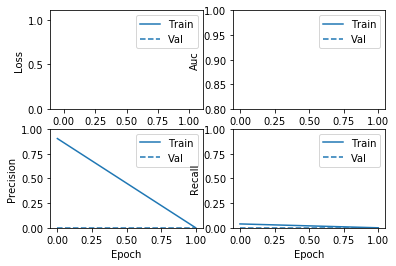

In [556]:
plot_metrics(history)


In [557]:
y_pred = model.predict(X_eval)

score = model.evaluate(X_eval, y_eval,verbose=1)

print(score)
print(np.around(y_pred))
print ("F1", f1_score(y_eval, np.around(y_pred)))



3394/3394 [==============================] - 0s 72us/step
[nan, 0.0, 0.0, 305.0, 3089.0, 0.0, 0.0, 0.0, 0.0]
[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [261]:

#print(test_features_df.isnull().any())
for x in test_features_df.columns:
    print(x)

additional_fare
duration
meter_waiting
meter_waiting_fare
meter_waiting_till_pickup
fare
peak_time
weekday
distance
dayOfWeek_0
dayOfWeek_1
dayOfWeek_2
dayOfWeek_3
dayOfWeek_4
dayOfWeek_5
dayOfWeek_6
hour_0
hour_1
hour_2
hour_3
hour_4
hour_5
hour_6
hour_7
hour_8
hour_9
hour_10
hour_11
hour_12
hour_13
hour_14
hour_15
hour_16
hour_17
hour_18
hour_19
hour_20
hour_21
hour_22
hour_23


In [138]:
print(len(test_features_df.columns))

9


In [139]:
#scaler = StandardScaler().fit(test_features_df)
test_features_df_arr = scaler.transform(test_features_df)


In [140]:
test_preds = model.predict(test_features_df_arr)
test_preds = np.around(test_preds).astype(int)
print(test_preds)

[[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]]


In [141]:
test_preds_df = pd.DataFrame(
    {
        "fare": test_preds[0]
    },
    index = test_features_df.index
)
print("test_preds.shape:", test_preds.shape)

co = 0
for val in np.around(test_preds):
    if val == 0:
        co+=1
print(co)

test_preds_df.describe()

test_preds.shape: (8576, 1)
746


,fare
count,8576.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [142]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test_features_df.index.values, 
                              submission_df.index.values)

# Save predictions to submission data frame
submission_df["prediction"] = test_preds

submission_df.head()

,prediction
tripid,
213284604,1
213286352,0
213293973,1
213294622,1
213298687,1


In [143]:
submission_df.to_csv('submission.csv', index=True)
!head submission.csv

tripid,prediction
213284604,1
213286352,0
213293973,1
213294622,1
213298687,1
213299545,0
213302332,1
213302671,1
213305594,1
